# Decision Trees

By Rama Vempati

To connect with or follow me on LinkedIn [Click Here](https://www.linkedin.com/in/ramavempati/)


### Introduction

* Very intutive and easy to understand
* Non-parametric supervised learning method for regression & classification
* It's similar to playing 'dumb charades'.
* A good algorithm will have less & right questions compared to not-so-good ones. One can think the nodes are questions & leafs are predictions

### History

* Decision Tree is based on (CART) which is advancement of ID3, developed in 1986 by Ross Quinlan.
* ID3 works when feature data & target data both are categorical in nature
* C4.5 is an advancement of ID3, it coverts continues features into categorical features. Then, proceeds with ID3
* CART is based on C4.5, with slight advancement of 'target can be continues'.
* scikit-learn decision trees are based on CART

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tennis_data = pd.read_csv('data/tennis.csv')
tennis_data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


**A decision tree for above data would like below**

![](images/tennis.png)

### How does the split happen?

Gini impurity and entropy are what are called selection criterion for decision trees. Essentially they help you determine what is a good split point for root/decision nodes on classification/regression trees. 

**Gini** measurement is the probability of a random sample being classified incorrectly if we randomly pick a label according to the distribution in a branch.

**Entropy** is a measurement of information (or rather lack thereof). You calculate the information gain by making a split. Which is the difference in entripies. This measures how you reduce the uncertainty about the label.

### Entropy of play

Entropy(play) = – p(Yes) . log2p(Yes) – p(No) . log2p(No)

In [3]:
tennis_data.play.value_counts()

yes    9
no     5
Name: play, dtype: int64

In [4]:
Entropy_Play = -(9/14)*np.log2(9/14) -(5/14)*np.log2(5/14)
Entropy_Play

0.9402859586706311

### Information Gain

* The information gain is based on the decrease in entropy after a dataset is split on an attribute.
* Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).
* Gain(S, A) = Entropy(S) – ∑ [ p(S|A) . Entropy(S|A) ]
* We intend to choose the attribute, splitting by which information gain will be the most
* Next step is calculating information gain for all attributes

### Information Gain on splitting by Outlook

* Gain(Play, Outlook) = Entropy(Play) – ∑ [ p(Play|Outlook) . Entropy(Play|Outlook) ]
* Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – [ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ] – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ]

In [6]:
tennis_data[tennis_data.outlook == 'sunny']

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
10,sunny,mild,normal,True,yes


In [7]:
# Entropy(Play|Outlook=Sunny)
Entropy_Play_Outlook_Sunny =-(3/5)*np.log2(3/5) -(2/5)*np.log2(2/5)

Entropy_Play_Outlook_Sunny

0.9709505944546686

In [8]:
tennis_data[tennis_data.outlook == 'overcast']

,outlook,temp,humidity,windy,play
2,overcast,hot,high,False,yes
6,overcast,cool,normal,True,yes
11,overcast,mild,high,True,yes
12,overcast,hot,normal,False,yes


**Entropy(Play|Outlook=overcast) = 0 **

**Since, it's a homogenous data entropy will be 0 **

In [9]:
tennis_data[tennis_data.outlook == 'rainy']

,outlook,temp,humidity,windy,play
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
9,rainy,mild,normal,False,yes
13,rainy,mild,high,True,no


In [10]:
# Entropy(Play|Outlook=rainy)
Entropy_Play_Outlook_Rain = -(2/5)*np.log2(2/5) - (3/5)*np.log2(3/5)

Entropy_Play_Outlook_Rain

0.9709505944546686

### Gain on splitting by attribute outlook

In [11]:
#Gain(Play, Outlook) = Entropy(Play) – [ p(Play|Outlook=Sunny) . Entropy(Play|Outlook=Sunny) ] – 
#[ p(Play|Outlook=Overcast) . Entropy(Play|Outlook=Overcast) ] – [ p(Play|Outlook=Rain) . Entropy(Play|Outlook=Rain) ]

Entropy_Play - (5/14)*Entropy_Play_Outlook_Sunny - (4/14)*0 - (5/14) * Entropy_Play_Outlook_Rain

0.24674981977443933

Similarly, we can also calculate gains for below

Gain(Play, Temperature) - 0.029

Gain(Play, Humidity) - 0.151

Gain(Play, Wind) - 0.048

Based on above we can say that the split must happen at Outlook

![](images/tennis_split1.png)

We can continue the above approach for further splits

### Decision Tree using scikit-learn API

Let us look at an example to split the data using API provided by scikit-learn package

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics # for score / accuracy

In [13]:
df = pd.read_csv('data/data.csv')
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [14]:
df.shape

(569, 33)

In [15]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Train Test Split

Use train_test_split to split data into a training set and a testing set.

In [16]:
from sklearn.model_selection import train_test_split
X = df[['radius_mean', 'texture_mean', 'perimeter_mean', 
        'area_mean', 'smoothness_mean', 'compactness_mean', 
        'concavity_mean', 'concave points_mean', 'symmetry_mean', 
        'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
        'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 
        'concave points_se', 'symmetry_se', 'fractal_dimension_se', 
        'radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 
        'smoothness_worst','compactness_worst','concavity_worst', 'concave points_worst',
        'symmetry_worst', 'fractal_dimension_worst']].values

y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [17]:
# Function for spltting the tree based on heuristic
def MyDecisionTreeClassifier(heuristic, tree_depth = None):
    decision_tree_clfr = DecisionTreeClassifier(criterion = heuristic, max_depth = tree_depth)
    
    #Apply classifier on training dataset
    decision_tree_clfr.fit(X_train, y_train)
    
    return decision_tree_clfr

In [18]:
heuristic_g = "gini"
decision_tree_g = DecisionTreeClassifier(criterion = heuristic_g)

#Apply classifier on train dataset
decision_tree_g.fit(X_train,y_train)

# predict lables using remaining testset
predTree_g = decision_tree_g.predict(X_test)

print("Decision Trees's Accuracy using Gini: ", metrics.accuracy_score(y_test, predTree_g))
print("Depth of Decision Tree: ", decision_tree_g.tree_.max_depth)

Decision Trees's Accuracy using Gini:  0.9415204678362573
Depth of Decision Tree:  6


In [19]:
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
import numpy as np

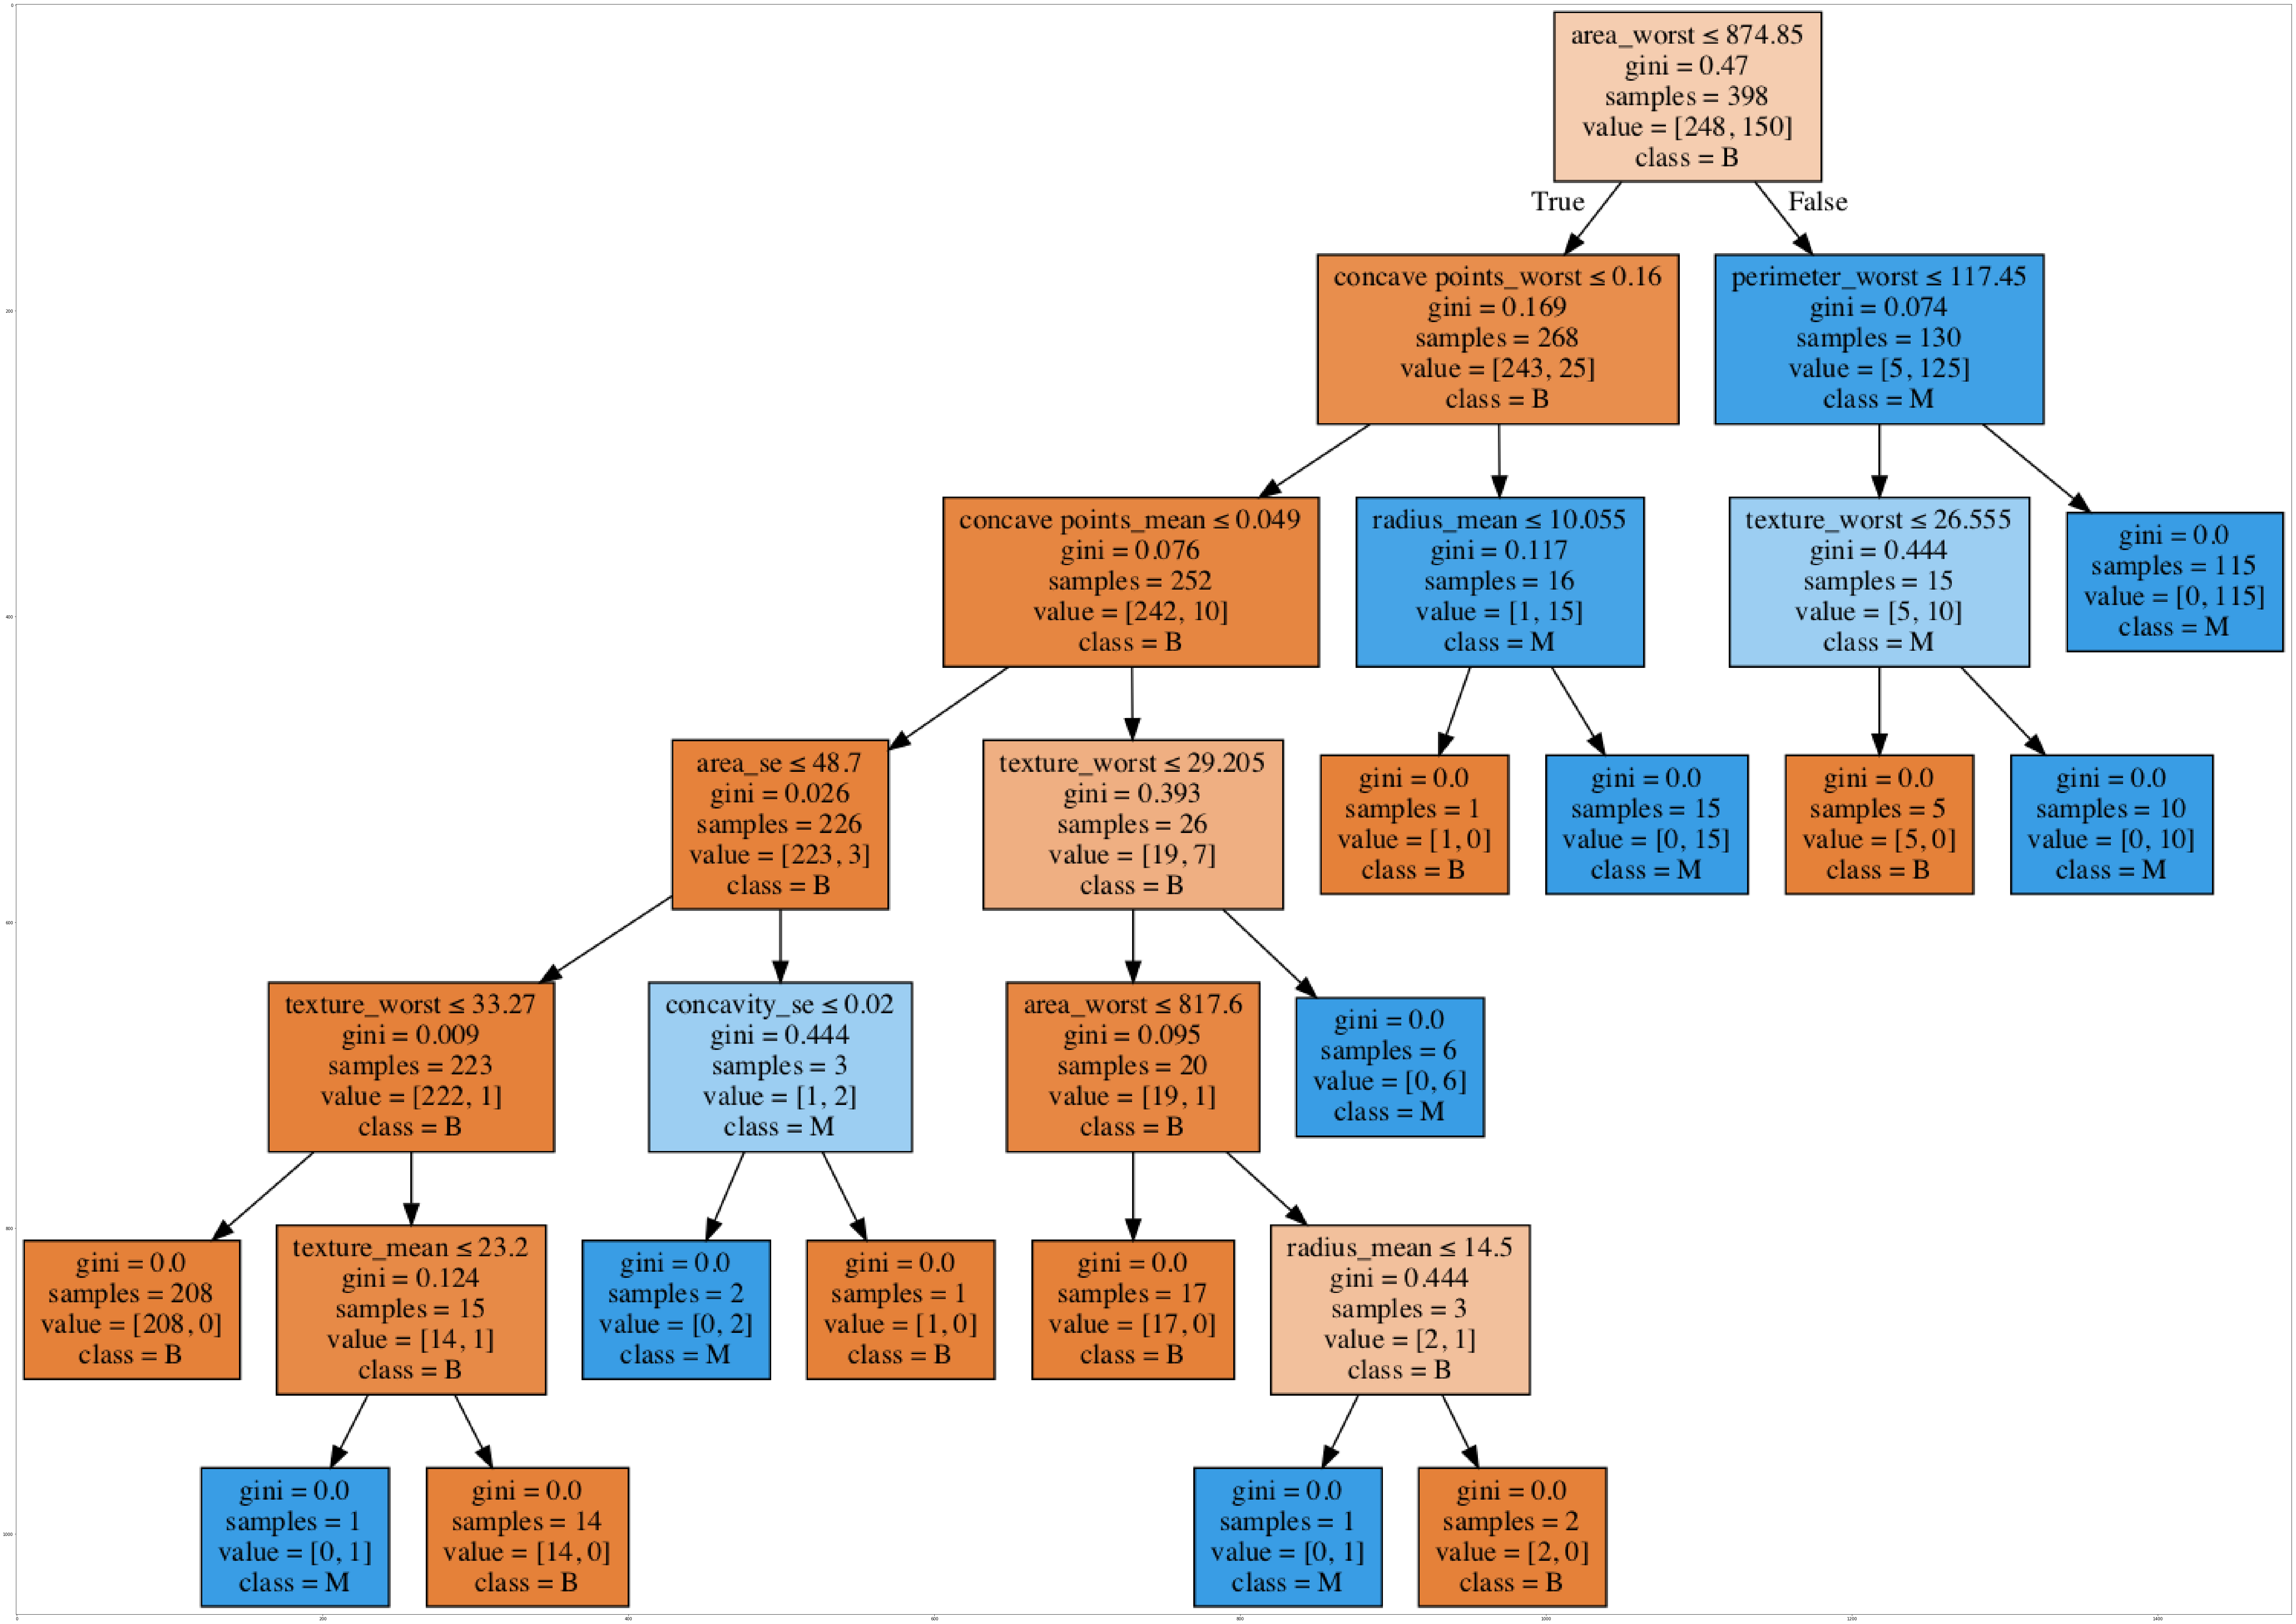

In [20]:
fileName_g = "decision-tree-gini.png"


dot_data = StringIO()
featureNames = df.columns[2:32]
labedNames = df["diagnosis"].unique().tolist()
    
# export_graphviz will convert decision tree classifier into dot file
tree.export_graphviz(decision_tree_g,feature_names = featureNames, out_file = dot_data,
                         class_names = np.unique(y_train), filled = True,  special_characters = True,rotate = False) 
    
# Convert dot file int pgn using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
#write pgn into file
graph.write_png(fileName_g)

#display tree image
img_g = mpimg.imread(fileName_g)
plt.figure(figsize=(100, 200))
plt.imshow(img_g, interpolation='nearest')

In [21]:
heuristic = "entropy"
decision_tree = MyDecisionTreeClassifier(heuristic)

# predict lables using remaining testset
predTree = decision_tree.predict(X_test)

print("Decision Trees's Accuracy using entropy: ", metrics.accuracy_score(y_test, predTree))
print("Depth of Decision Tree: ", decision_tree.tree_.max_depth)

Decision Trees's Accuracy using entropy:  0.935672514619883
Depth of Decision Tree:  5


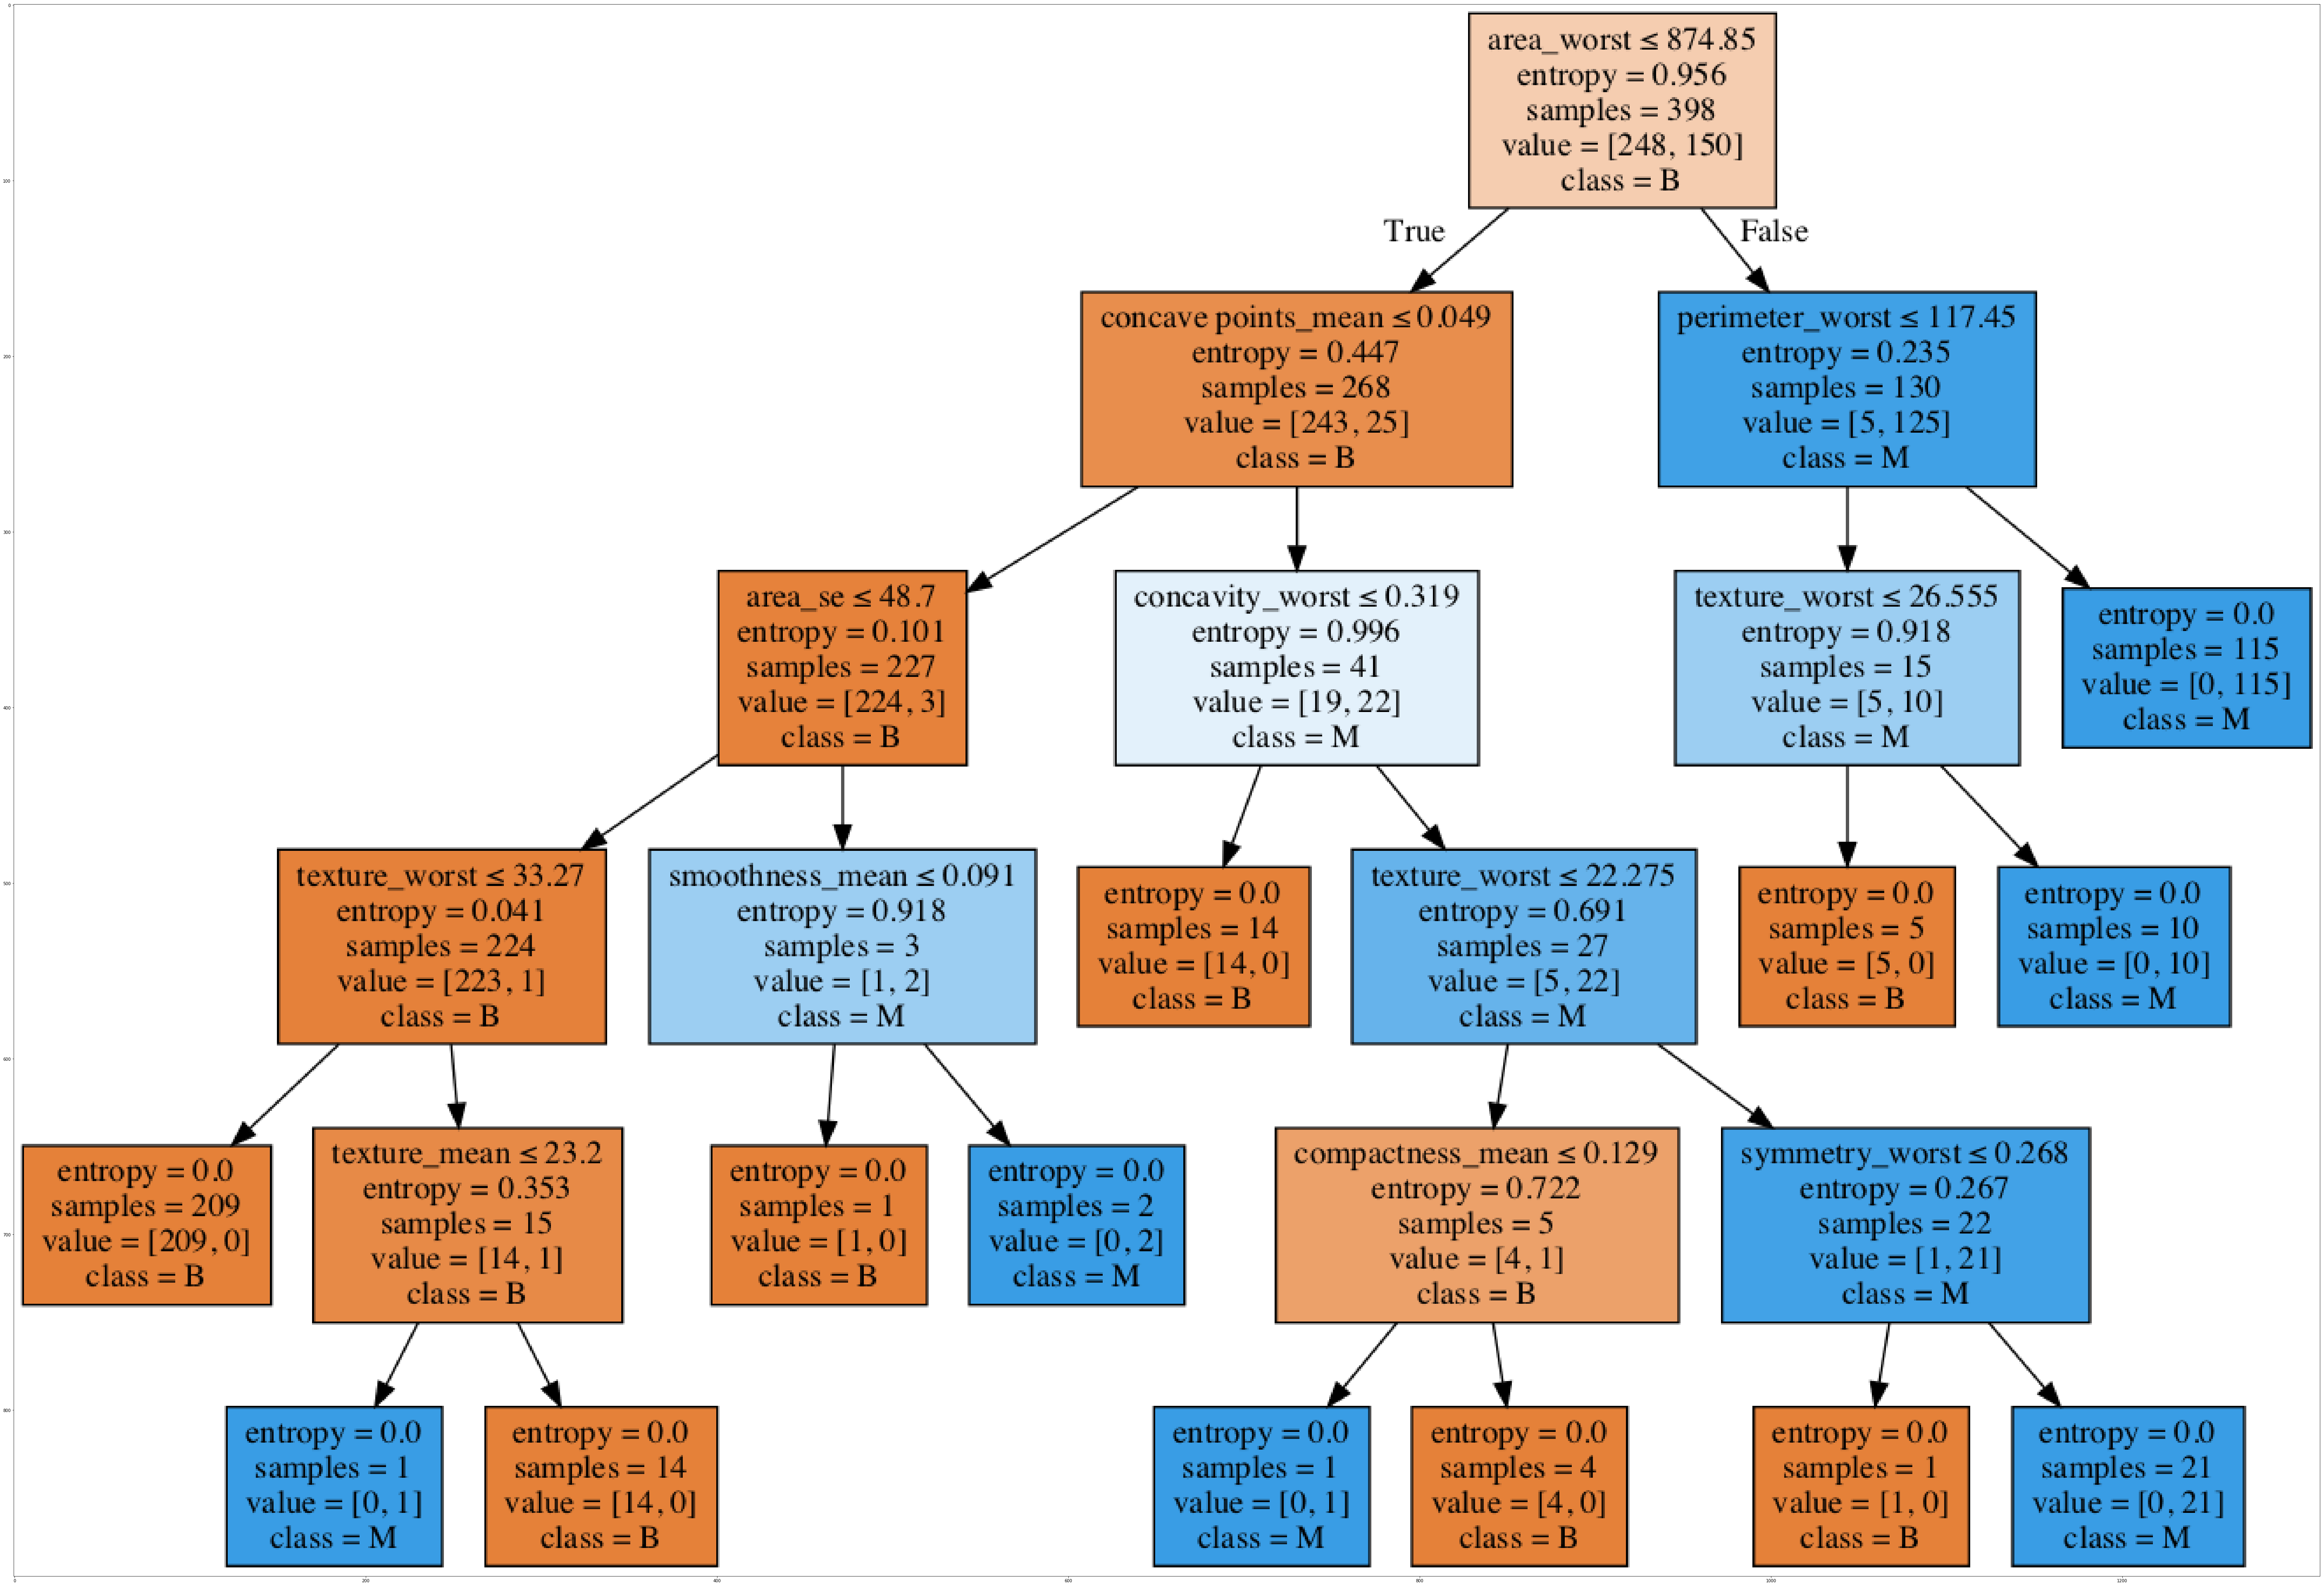

In [22]:
fileName_entropy = "decision-tree-entropy.png"

dot_data = StringIO()
featureNames = df.columns[2:32]
labedNames = df["diagnosis"].unique().tolist()
    
# export_graphviz will convert decision tree classifier into dot file
tree.export_graphviz(decision_tree,feature_names = featureNames, out_file = dot_data,
                         class_names = np.unique(y_train), filled = True,  special_characters = True,rotate = False) 
    
# Convert dot file int pgn using pydotplus
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
#write pgn into file
graph.write_png(fileName_entropy)

#display tree image
img_entropy = mpimg.imread(fileName_entropy)
plt.figure(figsize=(100, 200))
plt.imshow(img_entropy, interpolation='nearest')

### Pruning to Avoid Overfitting

How we can avoid Overfitting ? Overfitting can be avoided by using these parameters

* max_leaf_nodes - This parameter can be used to define the max number of leaf nodes
* min_samples_leaf - This parameter can be userd to restrict the size of sample leaf
* max_depth - It can be used to reduce the depth of the tree to build a generalized tree

In [23]:
startingPoint = 2
accuracy_1 = np.zeros((decision_tree.tree_.max_depth - 1))

for x in range(startingPoint, decision_tree.tree_.max_depth + 1):
    heuristic = "entropy"
    decision_tree = MyDecisionTreeClassifier(heuristic)

    # predict lables using remaining testset
    predTree = decision_tree.predict(X_test)
    
    accuracy_1 [x-startingPoint] = metrics.accuracy_score(y_test, predTree)
    
    print("Decision Trees's Accuracy (entropy) with depth:", x , " is ", accuracy_1 [x-startingPoint],"")

Decision Trees's Accuracy (entropy) with depth: 2  is  0.935672514619883 
Decision Trees's Accuracy (entropy) with depth: 3  is  0.935672514619883 
Decision Trees's Accuracy (entropy) with depth: 4  is  0.9473684210526315 
Decision Trees's Accuracy (entropy) with depth: 5  is  0.935672514619883 


In [24]:
import matplotlib.pyplot as plt
def ShowAccuracy(_range, data):
    plt.plot(range(2,_range+1),data,'g')
    plt.legend(('Accuracy'))
    plt.ylabel('Accuracy ')
    plt.xlabel('Depth')
    plt.tight_layout()
    plt.show()

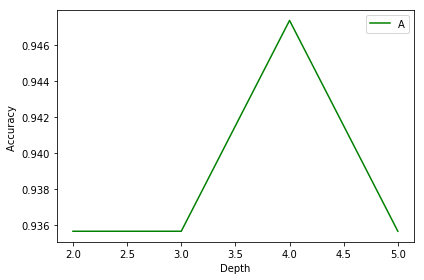

In [25]:
ShowAccuracy(decision_tree.tree_.max_depth, accuracy_1)

In [26]:
startingPoint = 2
depth = np.zeros((decision_tree_g.tree_.max_depth - 1))
accuracy_2 = np.zeros((decision_tree_g.tree_.max_depth - 1))

for x in range(startingPoint, decision_tree_g.tree_.max_depth + 1):
    heuristic = "gini"
    decision_tree = MyDecisionTreeClassifier(heuristic)

    # predict lables using remaining testset
    predTree = decision_tree.predict(X_test)
    
    depth [x-startingPoint] = x;
    accuracy_2 [x-startingPoint] = metrics.accuracy_score(y_test, predTree)
    
    print("Decision Trees's Accuracy (Gini) with depth:",x, " is ", accuracy_2 [x-startingPoint],"")

Decision Trees's Accuracy (Gini) with depth: 2  is  0.9473684210526315 
Decision Trees's Accuracy (Gini) with depth: 3  is  0.9473684210526315 
Decision Trees's Accuracy (Gini) with depth: 4  is  0.9473684210526315 
Decision Trees's Accuracy (Gini) with depth: 5  is  0.935672514619883 
Decision Trees's Accuracy (Gini) with depth: 6  is  0.9532163742690059 


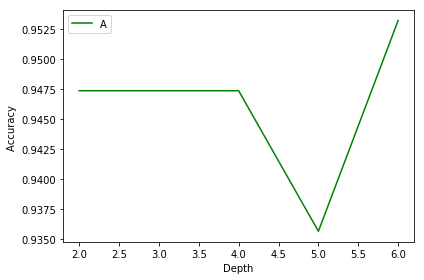

In [27]:
ShowAccuracy(decision_tree_g.tree_.max_depth, accuracy_2)

### Advantages of Decision Tree

* Highly Interpretable & can be visualized
* Minimal data preprocessing - missing data handling, normalizing, one-hot-encoding not required
* Handle both neumerical & categorical values

### Limitations of Decision Tree

* Overfitting - height of tree kept growing with addition of more data
* Slight changes in data or order of data can change the tree
* Imbalanced classes datasets creates biased tree so data needs balancing

However the above limitations can overcome by a powerful ensembling technique called Random Forest

### Pruning

A technique of machine learning which reduces height of the tree by chopping off parts of the tree that's not doing anything significant in prediction

Two types of pruning - Prepruning & Postpruning

* Prepruning : Don't allow tree to grow beyond this point

* Postpruning : Allows tree to grow as much as possible, then prune the tree

Pruning is not currently supported in scikit. However you can use min_samples_leaf & max_height parameters to limit the growth of a decision tree